<a href="https://colab.research.google.com/github/SuperDataWorld/Python/blob/main/Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SuperDataWorld/Python/main/Data/StudentsPerformance.csv')

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
df.columns = ['gender', 'ethnicity', 'parentaledu', 'lunch', 'prep', 'math', 'reading','writing']

In [41]:
df.head()

,gender,ethnicity,parentaledu,lunch,prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.parentaledu.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parentaledu, dtype: int64

In [43]:
#Dummy Bins

pd.get_dummies(df.parentaledu)

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,0,1,0,0,0
997,0,0,1,0,0,0
998,0,0,0,0,1,0


In [44]:
# Numeric Bins

df['parentaledu'] = pd.Categorical(df.parentaledu, ordered = True, 
  categories = ["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"])
print(df.parentaledu.min())
print(df.parentaledu.max())
df['parentaledu']


some high school
master's degree


0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parentaledu, Length: 1000, dtype: category
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' <
                         'bachelor's degree' < 'master's degree']

In [45]:
df['parentaledu'].cat.codes

0      4
1      2
2      5
3      3
4      2
      ..
995    5
996    1
997    1
998    2
999    2
Length: 1000, dtype: int8

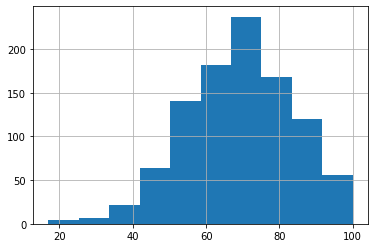

In [46]:
df.reading.hist()

In [47]:
lables = ['low','average','high']

#Equi-width Bining

df['readingrank'] = pd.cut(df.reading, bins = 3, labels = lables)
df.readingrank.value_counts()

average    514
high       433
low         53
Name: readingrank, dtype: int64

In [48]:
#Equi-depth Bining
df['readingrank2'] = pd.qcut(df.reading, q = 3, labels = lables)
df.readingrank2.value_counts()

low        341
average    340
high       319
Name: readingrank2, dtype: int64

In [49]:
df.groupby('readingrank2')['reading'].mean()

readingrank2
low        53.143695
average    70.129412
high       85.275862
Name: reading, dtype: float64

In [50]:
df.groupby('readingrank')['reading'].mean()

readingrank
low        37.622642
average    61.264591
high       82.413395
Name: reading, dtype: float64